Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Marius Alexandru Gurita | k12122899 | 13.12.2021


<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 4 &ndash; Logistic regression as a door opener to Deep Learning  </h2>

<b>Authors:</b> Brandstetter, Schäfl, Winter, Parada-Cabaleiro, Schörgenhumer<br>
<b>Date:</b> 29-11-2021

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

In [1]:
# Required packages and the u4_utils file
import u4_utils as u4
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from types import SimpleNamespace


u4.check_module_versions()
# Set plotting style of seaborn related plots.
sns.set()

Installed Python version: 3.8 (✓)
Installed numpy version: 1.20.1 (✓)
Installed pandas version: 1.2.4 (✓)
Installed scikit-learn version: 0.24.1 (✓)
Installed matplotlib version: 3.3.4 (✓)
Installed seaborn version: 0.11.1 (✓)
Installed torch version: 1.10.0 (✓)


**Note**: When specifying a seed for the sources of randomness, use the `u4.set_seed(seed=XYZ)` function.

# Exercise 1

Given the dataset defined below, use the functions from <code>u4_utils.py</code> (according to the instructions given in the lecture notebook) to perform the following tasks:

<table>
    <tr>
        <th>Parameter</th>
        <th>Value (used in this notebook)</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><code>num_pairs</code></td>
        <td>75</td>
        <td>amount of $(x, y)$ pairs to generate</td>
    </tr>
    <tr>
        <td><code>variance</code></td>
        <td>0.2</td>
        <td>variance within $y$ w.r.t. defining function</td>
    </tr>
</table>

- In order to find the <i>linear</i> model which best describes the given dataset, look for the optimal parameters $k$ and $d$ manually. Then, plot both the data pairs and the linear model (defined by your coefficients). 

**Note**: For reproducibility, set a fixed seed (seed=42).

- Perform the previous task but this time by setting the parameters 'automatically', in a way that the <b>Mean Squared Error</b> between the linear model and the data pairs is minimized. Again, plot both the data pairs and the linear model.

**Note**: After performing the second task, you might revise the answer you have given to the first one.

           x         y
0   0.496714  0.614994
1  -0.138264  0.200062
2   0.647689  0.454523
3   1.523030  0.902071
4  -0.234153 -0.255327
..       ...       ...
70  0.361396  0.549874
71  1.538037  0.642661
72 -0.035826 -0.038210
73  1.564644  1.005668
74 -2.619745 -0.805135

[75 rows x 2 columns]


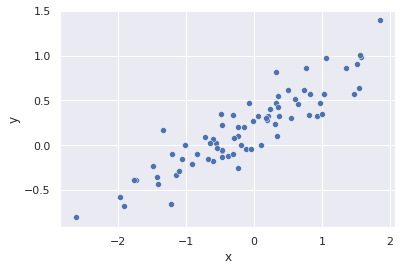

In [2]:
# Set seed for reproducibility.
u4.set_seed(seed=42)

# Create dataset consisting of random (x, y) pairs.
dataset = u4.get_dataset(
    num_pairs=75,
    variance=0.2
)
print(dataset)
# Plot the dataset.
sns.scatterplot(data=dataset, x="x", y="y");

**1.1. Manually define the coefficients of an underlying linear model. Plot data pairs as well as the defined linear model.**

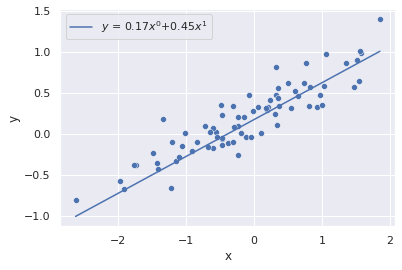

In [3]:
coefficients = (
    0.17,  # intercept
    0.45   # slope
)

# Plot data pairs as well as the defined linear model.
u4.plot_model(
    dataset=dataset,
    coefficients=coefficients)


**1.2. Determine the coefficients 'automatically'. Plot data pairs as well as the defined linear model.**

The coefficients minimizing the MSE are:
    coefficient 0: 0.23
    coefficient 1: 0.41


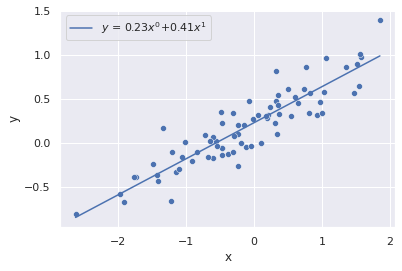

In [4]:
coefficients = u4.minimize_mse(
    dataset=dataset,
    degree=1  #
)

print("The coefficients minimizing the MSE are:")
for i, c in enumerate(coefficients):
    print(f"    coefficient {i}: {c}")
    
coefficients = (
    0.23,  # intercept
    0.41 # slope
)

# Plot data pairs as well as the defined linear model.
u4.plot_model(
    dataset=dataset,
    coefficients=coefficients)

# Exercise 2

For reproducibility, for each of the following tasks, set a fixed seed (seed=42).

- Generate a new dataset considering the characteristics defined below and plot both the dataset and the underlying model.

<table>
    <tr>
        <th>Parameter</th>
        <th>Value (used in this notebook)</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><code>num_pairs</code></td>
        <td>25</td>
        <td>amount of $(x, y)$ pairs to generate</td>
    </tr>
    <tr>
        <td><code>variance</code></td>
        <td>0.5</td>
        <td>variance within $y$ w.r.t. defining function</td>
    </tr>
    <tr>
        <td><code>coefficients</code></td>
        <td><code>np.random.rand(4)</code></td>
        <td>upper bound of random polynomial degree</td>
    </tr>
</table>

**Note**: When defining the dataset, pass the random coefficients for the underlying model via the parameter `coefficients`. Also make sure to use the same random coefficients for plotting.

- Define a model by 'automatically' retrieving the optimal coefficients which minimize the MSE. Then, print out the optimal coefficients and plot both the data pairs and the optimized model.

- Compute and print out the difference between the random coefficients from the underlying model (used to generate the dataset) and the optimal coefficients ('automatically' computed) which minimize the MSE.

**2.1. Create the dataset with random coefficients. Plot data pairs as well as the defined linear model.**

    coefficient 0: 0.3745401188473625
    coefficient 1: 0.9507143064099162
    coefficient 2: 0.7319939418114051
    coefficient 3: 0.5986584841970366


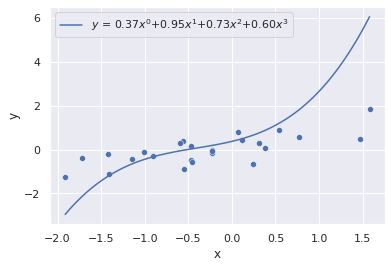

In [5]:
# Set seed for reproducibility.
u4.set_seed(seed=42)
coefficients = np.random.rand(4)
# Create dataset conisting of random (x, y) pairs.
dataset = u4.get_dataset(
    num_pairs=25,
    variance=0.5,
    
)

u4.plot_model(
    dataset=dataset,
    coefficients=coefficients
)
coefficients1 = coefficients
for i, c in enumerate(coefficients1):
    print(f"    coefficient {i}: {c}")

**2.2. Determine the coefficients 'automatically' and print them. Plot data pairs as well as the defined linear model.**

The coefficients minimizing the MSE are:
    coefficient 0: 0.08
    coefficient 1: 0.46
    coefficient 2: 0.16
    coefficient 3: 0.07
    coefficient 4: -0.02


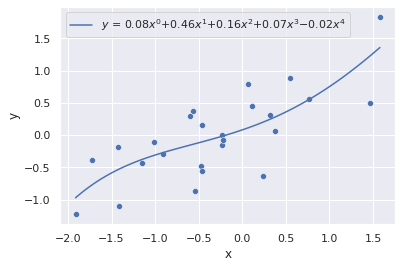

In [6]:
coefficients = u4.minimize_mse(
    dataset=dataset,
    degree=4  #
)

print("The coefficients minimizing the MSE are:")
for i, c in enumerate(coefficients):
    print(f"    coefficient {i}: {c}")
    

coefficients2 = coefficients
# Plot data pairs as well as the defined linear model.
u4.plot_model(
    dataset=dataset,
    coefficients=coefficients)

**2.3. Determine the difference between the random coefficients and the optimized coefficients and print this difference for each coefficient.**

In [7]:
i = 0
for c1, c2 in zip(coefficients1, coefficients2):
    c = c1 - c2
    print(f"    difference between the random coefficients {i}  and the optimized coefficients {i}: {c}")
    i += 1

    difference between the random coefficients 0  and the optimized coefficients 0: 0.2945401188473625
    difference between the random coefficients 1  and the optimized coefficients 1: 0.49071430640991615
    difference between the random coefficients 2  and the optimized coefficients 2: 0.5719939418114051
    difference between the random coefficients 3  and the optimized coefficients 3: 0.5286584841970365


# Exercise 3

In this exercise, we will consider that $y$ is a binary variable, i.e., the label of each data point is either 0 or 1. Under this premise, we will create a new dataset.

- Following the lecture notebook, choose the correct function from <code>u4_utils.py</code> to generate a dataset with binary labels consisting of 25 data pairs (feature, label). Then, plot it. For reproducibility, choose a fixed random seed of seed=27.

- Use the corresponding function in `u4_utils.py` to minimize the cross entropy loss and choose the combination of hyperparameters that enables the logistic regression model to best separate the two classes. Then, plot the dataset and the logistic regression model. Retrieve the optimal combination by taking the following values for each hyperparameter into account:

Hyperparameter | Values
:--- | :---
`iterations` | 10, 100
`learning_rate` | 1, 10, 100
`momentum` | 0.3, 0.9

**Note**: For determining the best hyperparameters in this example, it is enough to simply look at the resulting model plot, i.e., you do not have to make any computations, a visual check is sufficient.

**3.1. Create a logistic dataset and plot it.**

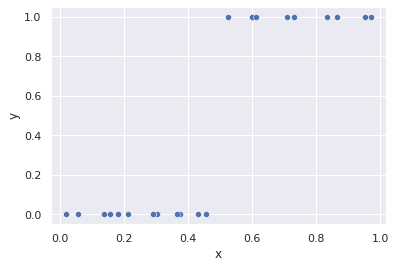

In [8]:
# Set seed for reproducibility.
u4.set_seed(seed=42)

# Create dataset conisting of random (x, y) pairs.
dataset = u4.get_dataset_logistic(
    num_pairs=25
)
sns.scatterplot(data=dataset, x="x", y="y");

**3.2. Minimize cross entropy loss using the best hyperparameters. Plot data pairs as well as the defined logisitc model.**

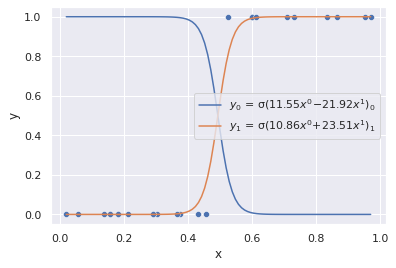

In [9]:
coefficients = u4.minimize_ce(
    dataset=dataset,
    iterations=100,
    learning_rate=10,
    momentum=0.9
)

u4.plot_logistic_model(
    dataset=dataset,
    coefficients=coefficients
)

# Exercise 4

Considering again a binary classification problem, we will now workwith the <code>DataSet_LR_a.csv</code> (same as in the lecture notebook).

- Load and process the dataset as shown in the lecture notebook but this time considering 75% (parameter `frac`) of the samples for training and 25% for testing. For reproducibility, set a seed=42. 

- Considering `iterations=1000` and `momentum=0.9` and by using the function to minimize the cross entropy loss, find a learning rate that enables the logistic regression model to achieve an accuracy on the **test set** higher than 93.5%. Also print out the model's accuracy. For reproducibility, set a seed=42.

-  Plot the 2D test dataset, once showing the true, actual labels (ground truth) and once showing the predicted labels.

**4.1. Load the CSV file and create the training and test datasets.**

In [10]:
u4.set_seed(seed=42)

dataset = u4.get_dataset_from_csv(path='resources/DataSet_LR_a.csv')
dataset_train = dataset.sample(frac=0.75, replace=False, axis=0)
dataset_test = dataset.drop(dataset_train.index)
print(dataset_train, dataset_test)

           x0        x1  y
44   0.710274  0.424337  1
47   0.761069  0.126840  1
4    0.133543  0.793624  0
55   0.336885  0.526784  0
26   0.807385  0.626873  1
..        ...       ... ..
41   0.920626  0.796762  1
58   0.967879  0.423681  1
48   0.773916  0.118142  1
101  0.134090  0.595935  0
57   0.029018  0.574770  0

[90 rows x 3 columns]            x0        x1  y
1    0.890748  0.003367  1
2    0.476996  0.973464  0
14   0.329724  0.838246  0
20   0.811240  0.052120  1
21   0.172253  0.376222  0
23   0.239775  0.674396  0
29   0.790245  0.434532  1
32   0.774364  0.756197  1
37   0.885688  0.323261  1
51   0.071039  0.007989  0
52   0.261922  0.142590  0
59   0.612960  0.917661  0
60   0.676948  0.650844  1
63   0.660224  0.401258  1
71   0.335087  0.968355  0
74   0.667465  0.241116  1
75   0.923029  0.826322  1
82   0.899614  0.668026  1
86   0.873496  0.232249  1
87   0.902726  0.394926  1
92   0.521315  0.494189  1
99   0.215348  0.286219  0
102  0.016677  0.717209  0
103  

**4.2. Minimize cross entropy loss and identify a learning rate that achieves at least 93.5% accuracy on the test set. Print the model's accuracy.**

In [11]:
u4.set_seed(seed=42)
coefficients = u4.minimize_ce(
    dataset=dataset_train,
    iterations=1000,
    learning_rate=117,
    momentum=0.9
)
predictions = u4.predict_logistic(dataset_test.drop(columns="y"), coefficients)

accuracy_train = (predictions == dataset_test["y"]).mean()
print(f"Accuracy on training set: {accuracy_train:.4f}")

Accuracy on training set: 0.9667


**4.3. Plot the test data, once showing the ground truth and once showing the predicted labels as 2D plots.**

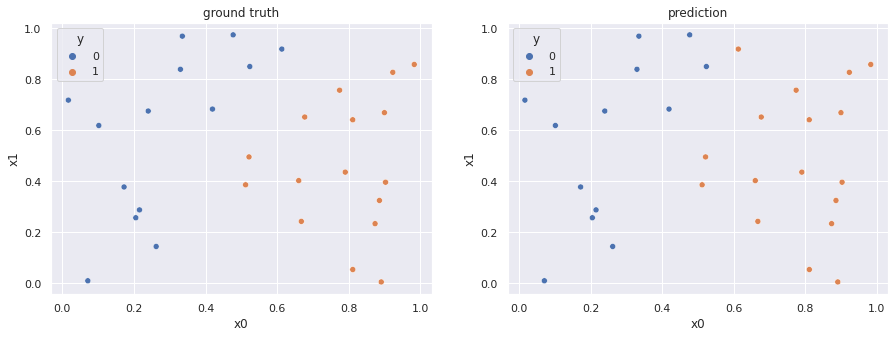

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot ground truth labels.
axes[0].set_title("ground truth")
sns.scatterplot(data=dataset_test, x="x0", y="x1", hue="y", ax=axes[0])
axes[1].set_title("prediction")
sns.scatterplot(data=dataset_test.assign(y=predictions), x="x0", y="x1", hue="y", ax=axes[1])
plt.show()

# Exercise 5

Considering the framework PyTorch and the instructions given in the lecture notebook, perform the following tasks:

- Generate a tensor of 2 dimensions with a shape of 2 x 4, containing random numbers from a standard normal distribution with (mean=0 and stddev=variance=1). Print out the tensor and its shape to be sure that your answer is correct. For reproducibility, set seed=42.

- Implement the function $g\left(x\right) = 5\cdot{}{x}^2$ related to the previously generated tensor using PyTorch.

- Print the output of the function considering as input the tensor you have created in the first task of this exercise.

- Compute the gradient of the previously defined function $g\left(x\right)$ for $x = 0.5$ using the automatic differentiation functionality of PyTorch. Following the lecture notebook, print $x$ as a tensor, the output of the function $g(x)$, and the gradient $g'(x)$

**5.1. Create a random 2 x 4 tensor and print it and its shape.**

In [13]:
u4.set_seed(seed = 42)
shape = (2,4)
print(shape)
x = torch.randn(shape)
print(x)

(2, 4)
tensor([[ 0.3367,  0.1288,  0.2345,  0.2303],
        [-1.1229, -0.1863,  2.2082, -0.6380]])


**5.2. Define the function `g(x)`, call it with your tensor from above and print the result.**

In [14]:
def g(x: torch.Tensor) -> torch.Tensor:
    return 5 * (x**2)
print(f'g(x)  = {g(x)}')

g(x)  = tensor([[ 0.5668,  0.0830,  0.2749,  0.2653],
        [ 6.3040,  0.1736, 24.3808,  2.0352]])


**5.3. Create a scalar tensor with the value 0.5 and print it. Call the function `g(x)` from above using this tensor and print the result. Compute the gradient `g'(x)` using this tensor and print the result.**

In [15]:
x = torch.tensor([0.5], requires_grad=True)
print(f'x = {x.item()}')
y = g(x)
print(f'g(x)  = {y.item()}')
dy = torch.autograd.grad(y, x)
print(f"g'(x) = {dy[0].item()}")

x = 0.5
g(x)  = 1.25
g'(x) = 5.0


# Exercise 6

With the MNIST dataset, perform the following tasks:

- Set the following hyperparameters (hint: `epochs` is the same as `iterations`):<br>
Hyperparameter | Value
:--- | :---
`batch_size` | 9
`epochs` | 1
`learning_rate` | 0.01
`momentum` | 0.7

- Load the dataset and fetch the test samples as well as test targets as shown in the lecture notebook.

**Note**: For reproducibility, for this one and **all** following tasks, set a fixed seed (seed=27).

- Train a logistic regression model on the training data, evaluate its accuracy on the test data and print out the results.

- Keeping `batch_size=9` and `epochs=1`, optimize the other two hyperparameters in a way that you achieve a better performance. Then, print out the results.

**Note**: You might consider some of the concepts learned in the previous units to automatize this process. Do not forget to set the seed if you want reproducible and comparable results.

**6.1. Set up hyperparameters.**

In [28]:
# Set seed for reproducibility.
u4.set_seed(seed=27)

# Set hyperparameters to be used in the training process.
# Note: The "SimpleNamespace(...)" wrapper is just for convenience so we can write "hyperparameters.XYZ", where "XYZ" are our specified variables.
hyperparameters = SimpleNamespace(
    batch_size=9,
    epochs=1,
    learning_rate=0.01,
    momentum=0.7
)


**6.2. Get the data loaders for the training and test MNIST data. Fetch the samples and targets.**

In [29]:
from itertools import islice
from torchvision.datasets import MNIST
u4.set_seed(seed=27)


train_loader, test_loader = u4.get_dataset_mnist(
    batch_size=hyperparameters.batch_size
)

samples = torch.stack([x for x, y in test_loader.dataset]).flatten(start_dim=1)
targets = test_loader.dataset.targets


**6.3. Minimize the cross entropy loss using the training data to get the coefficients of the logisitc model. Get the predictions for the test data using this model and print the accuracy on the test set.**

In [31]:
u4.set_seed(seed=27)

coefficients = u4.minimize_ce(
    dataset=train_loader,
    iterations=hyperparameters.epochs,
    learning_rate=hyperparameters.learning_rate,
    momentum=hyperparameters.momentum
)
samples = torch.stack([x for x, y in test_loader.dataset]).flatten(start_dim=1)
targets = test_loader.dataset.targets

# Compute predictions of trained logistic regression model w.r.t. the training data.
predictions = u4.predict_logistic(samples, coefficients)

# Compute accuracy given the predicted and the true training labels.
accuracy_test = (predictions == targets.numpy()).mean()
print(f"Accuracy on test set: {accuracy_test:.4f}")

Accuracy on training set: 0.9145


**6.4. Optimize the hyperparameters `learning_rate` and/or `momentum` to get a higher accuracy than above.**

In [47]:
u4.set_seed(seed=27)


coefficients = u4.minimize_ce(
    dataset=train_loader,
    iterations=hyperparameters.epochs,
    learning_rate=0.025,
    momentum=0.29
)
samples = torch.stack([x for x, y in test_loader.dataset]).flatten(start_dim=1)
targets = test_loader.dataset.targets

# Compute predictions of trained logistic regression model w.r.t. the training data.
predictions = u4.predict_logistic(samples, coefficients)

# Compute accuracy given the predicted and the true training labels.
accuracy_test = (predictions == targets.numpy()).mean()
print(f"Accuracy on test set: {accuracy_test:.4f}")

Accuracy on test set: 0.9147
